<a href="https://colab.research.google.com/github/chaitykundu/DistilBERT_Emotion_Recognition/blob/main/DistilBert_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets bertviz umap_learn transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.7 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

ds = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

split/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

split/validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

split/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [3]:
import pandas as pd

In [4]:
all_datasets = load_dataset("dair-ai/emotion") # Example: Loading the same dataset as before, or another dataset of your choice.
all_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
len(all_datasets)

3

In [6]:
'dair-ai/emotion' in all_datasets

False

In [7]:
from datasets import load_dataset

emotion = load_dataset('emotion')
emotion.set_format(type='pandas')

README.md: 0.00B [00:00, ?B/s]

split/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

split/validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

split/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [8]:
df=emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [9]:
emotion['train'].features['label'].names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [10]:
df['label_name'] = df['label'].apply(lambda x: emotion['train'].features['label'].int2str(x))
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


Dataset Analylist : Used for understand about dataset, class distribution and mostly data distribution

In [11]:
import matplotlib.pyplot as plt

label_counts = df['label_name'].value_counts()
label_counts

,count
label_name,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


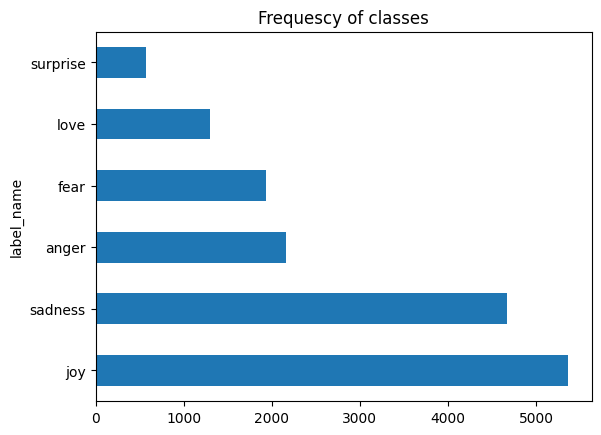

In [12]:
label_counts.plot(kind='barh')
plt.title('Frequescy of classes')
plt.show()

<Axes: title={'center': 'words per tweet'}, xlabel='label_name'>

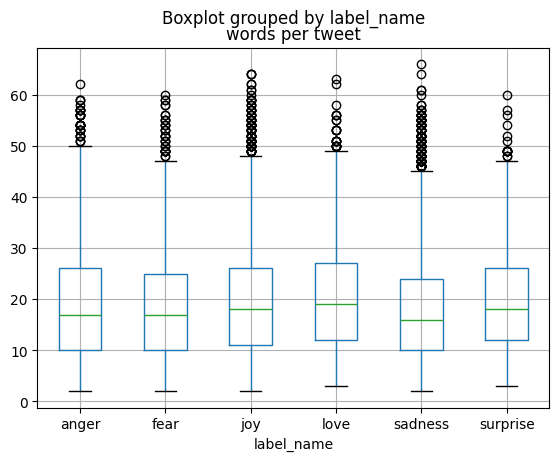

In [13]:
df['words per tweet'] = df['text'].str.split().apply(len)
df.boxplot("words per tweet", by='label_name')

In [14]:
from transformers import AutoTokenizer
model_ckpt = "distilbert/distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [15]:
text= "Machine learning is the part of Artificial Intrelligent."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 3698, 4083, 2003, 1996, 2112, 1997, 7976, 20014, 22948, 11461, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [16]:
tokens= tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'machine', 'learning', 'is', 'the', 'part', 'of', 'artificial', 'int', '##relli', '##gent', '.', '[SEP]']


In [17]:
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

In [18]:
emotion.reset_format()

In [19]:
#map

def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)
  return temp

print(tokenize(emotion["train"][:1]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1]]}


In [20]:
emotions_encoded = emotion.map(tokenize, batched=True, batch_size=None)
emotions_encoded

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

#Model Building

In [21]:
text

'Machine learning is the part of Artificial Intrelligent.'

In [22]:
inputs= tokenizer(text, return_tensors="pt")
inputs

{'input_ids': tensor([[  101,  3698,  4083,  2003,  1996,  2112,  1997,  7976, 20014, 22948,
         11461,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [23]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [24]:
with torch.no_grad():
  outputs = model(**inputs)
last_hidden_states =outputs.last_hidden_state
last_hidden_states

tensor([[[-0.2788, -0.1486, -0.3283,  ..., -0.2262, -0.0388,  0.5675],
         [ 0.0686,  0.1330, -0.3925,  ..., -0.2651,  0.4352,  0.3737],
         [-0.3569, -0.0054, -0.6953,  ..., -0.6069, -0.1491,  0.2885],
         ...,
         [ 0.2822, -0.1494,  0.0360,  ..., -0.3513, -0.2960,  0.4947],
         [ 0.8620,  0.0817, -0.5684,  ...,  0.1766, -0.6390, -0.1817],
         [ 0.7122,  0.2437, -0.2824,  ...,  0.1104, -0.7070,  0.0095]]])

In [25]:
last_hidden_states.shape

torch.Size([1, 13, 768])

In [26]:
from transformers import AutoModelForSequenceClassification
import torch

num_labels = len(emotion['train'].features['label'].names)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
